In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

celebrity_deaths_3.csv



In [18]:
data = pd.read_csv("input/celebrity_deaths_3.csv")
data['celeb_name'] = data.name
data.fame_score = data.fame_score.fillna(0)
data['wiki_length'] = data.fame_score

data

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score,celeb_name,wiki_length
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0,Frank Cary,6030.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0,Bryan Harvey,5867.0
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0,Paul Lindblad,6711.0
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0,Charles O. Porter,6330.0
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0,Ofelia Fox,4353.0
5,52,1954,stroke,January,2006,New Guinean politician Prime Minister (1997–1...,Sir William Skate,Papua,6383.0,Sir William Skate,6383.0
6,31,1975,probably pulmonary embolism,January,2006,footballer (soccer player),Gábor Zavadszky,Hungarian,4175.0,Gábor Zavadszky,4175.0
7,31,1975,from injuries sustained in a biking accident,January,2006,football (soccer) player,José Luis Sánchez,Argentine,5103.0,José Luis Sánchez,5103.0
8,55,1951,NaN,January,2006,inventor (KISS rebreather),Gordon Smith,Canadian,3475.0,Gordon Smith,3475.0
9,70,1936,lung cancer,January,2006,actor (The Guiding Light),Don Stewart,American,3936.0,Don Stewart,3936.0


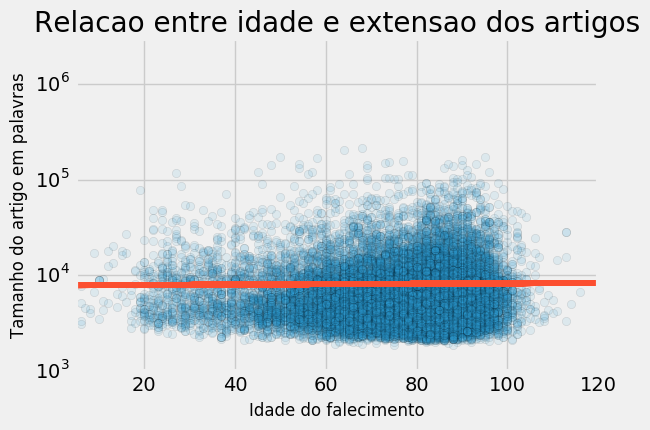

In [13]:
plt.semilogy(data.age,data.wiki_length,'o',alpha = 0.1)
plt.ylim([1*10**3,3*10**6])
plt.xlim([5,120])
x = data.age
y = np.array(data.wiki_length)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x,fit_fn(x))
plt.title('Relacao entre idade e extensao dos artigos')
plt.xlabel('Idade do falecimento', fontsize = 12)
plt.ylabel('Tamanho do artigo em palavras', fontsize = 12)
plt.show()

In [20]:
avg_len_year = []
std_len_year = []
for year in np.arange(2006,2017):
    avg_len_year.append(np.mean(data.wiki_length[data.death_year == year]))
    std_len_year.append(np.std(data.wiki_length[data.death_year == year]))
plt.figure(figsize = (7,7))
plt.errorbar(np.arange(2006,2017),avg_len_year,yerr = std_len_year,marker = 'o', markersize = 12)
plt.xlim([2005,2017])
plt.ylabel('Numero de palavras no artigo da Wikipedia')
plt.title('Tamanho do artigo vs Ano')
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)

In [ ]:
data.famous_for = data.famous_for.fillna(0)
words = ['singer','actor','actress','musician','writer','author','TV','movie','television','comedian','film']
for i,row in enumerate(data.iterrows()):
    data.loc[i,'flag'] = 0
    for word in words:
        if row[1].famous_for is not 0:
            if word in row[1].famous_for:
           # print row[1].celeb_name, row[1].famous_for
                data.loc[i,'flag'] = 1
                break